# Project: Investigate a Dataset - TMDb 5000 Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset opted for this project is the TMBd movie data. It is highly curated with varrying information to aide in the analysis with 10866 rows and 21 columns providing descriptions such as movie_id, direcotr, cast, budget just to mention a few.



### Questions for Analysis
1. What is the relationship between the Revenue, Popularity, and Rating?
2. Which year had the most popular genre?
3. Which Movie Has The Highest profit?
4. What are the charactaristics of highly performing revenue movie?
5. Who is the best director of 2015?

In [954]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

<a id='wrangling'></a>
## Data Wrangling

In [955]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movie_df = pd.read_csv("tmdb-movies.csv")

In [956]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [957]:
movie_df.shape

(10866, 21)


## Data Cleaning

In [958]:
#Duplicated values
movie_df.duplicated().sum()

1

In [959]:
#Display the duplicated values
movie_df[movie_df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [960]:
#Drop the diplicated value
movie_df.drop([2090], axis = 0, inplace = True)

In [961]:
#Confirm drop
movie_df[movie_df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [962]:
#Quick overview of movie dataframe
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [963]:
#Find null values in the data
movie_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [964]:
#Drop null values
movie_df.dropna(inplace = True)

In [965]:
#Confirm drop
movie_df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [966]:
# switch columns to the right data type
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])
movie_df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [967]:
#Observing all the runtimes of zero
is_runtime_zero = movie_df['runtime'] == 0
movie_df[is_runtime_zero].shape , movie_df[is_runtime_zero].index.values

((2, 21),
 array([ 334, 1289],
       dtype=int64))

In [968]:
movie_df[is_runtime_zero] #View all the runtimes of zero

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",2015-11-09,80,6.5,2015,0.000000e+00,0.0
1289,286372,tt1791681,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,http://www.imdb.com/title/tt1791681/,Michael G. Bartlett,No kids allowed,...,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,2014-10-20,16,3.4,2014,2.993546e+06,0.0


In [969]:
#Drop the observed zero runtimes
movie_df.drop(labels = [334, 1289 ], inplace = True)

In [970]:
#Observe and confrim
movie_df[is_runtime_zero]

C:\Users\reart\AppData\Local\Temp/ipykernel_8820/2325629113.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movie_df[is_runtime_zero]


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [971]:
#Observe the rows and columns
movie_df.shape

(1990, 21)

In [972]:
#Obsere the the info of the data
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 10819
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1990 non-null   int64         
 1   imdb_id               1990 non-null   object        
 2   popularity            1990 non-null   float64       
 3   budget                1990 non-null   int64         
 4   revenue               1990 non-null   int64         
 5   original_title        1990 non-null   object        
 6   cast                  1990 non-null   object        
 7   homepage              1990 non-null   object        
 8   director              1990 non-null   object        
 9   tagline               1990 non-null   object        
 10  keywords              1990 non-null   object        
 11  overview              1990 non-null   object        
 12  runtime               1990 non-null   int64         
 13  genres           

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 - What is the relationship between the Revenue, Popularity, and Rating? 

In [973]:
def plot_box(feature):
    movie_df.boxplot(feature, 
                     vert = True, 
                     showfliers = False)

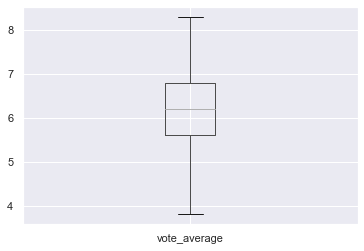

In [974]:
# Plot the vote ratings distribution.
plot_box('vote_average')

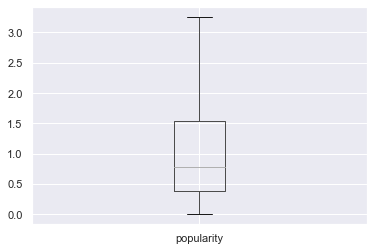

In [975]:
# Plot the popularity distribution
plot_box('popularity')

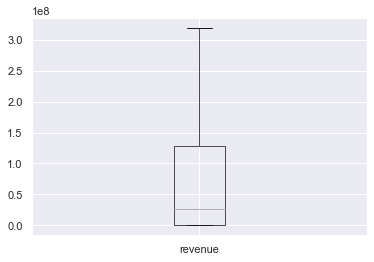

In [976]:
# Plot the revenue distribution
plot_box('revenue')

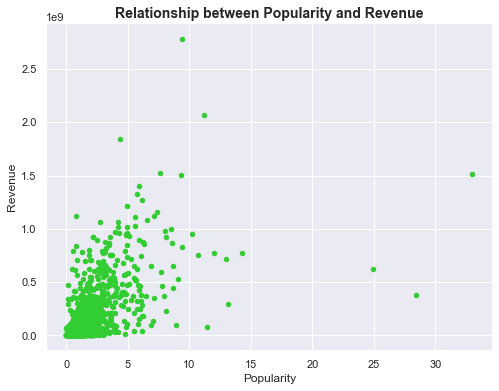

In [977]:
# Scatter plot of Revenue against Popularity 
movie_df.plot(x = 'popularity',
              y = 'revenue',
              kind = 'scatter', 
              color = 'limegreen', 
              figsize = (8,6))
plt.title('Relationship between Popularity and Revenue', 
          size = 14, 
          fontweight = 'bold')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
sns.despine()

##### INFERENCE 
1. After observing the scatter plot, its obvious popularity of movies rise with revenue invested

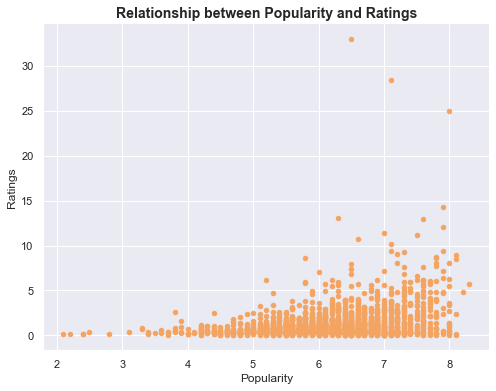

In [978]:
# Scatter plot of Popularity against Ratings
movie_df.plot(x = 'vote_average', 
              y = 'popularity', 
              kind = 'scatter', 
              color = 'sandybrown', 
              figsize = (8,6))
plt.title('Relationship between Popularity and Ratings',
          size = 14, 
          fontweight = 'bold')
plt.xlabel('Popularity')
plt.ylabel('Ratings')
sns.despine()

##### INFERENCE: 
1. The popularity of the movies increases with ratings on the average and right skewed but there are few outliers that overperformed.

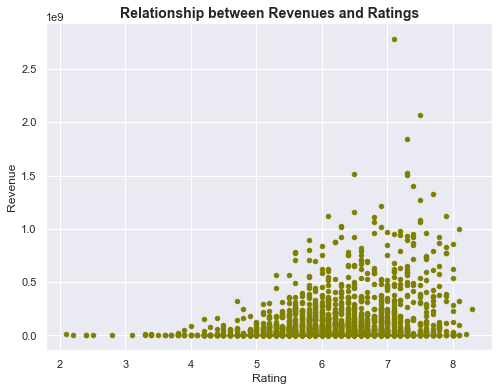

In [979]:
# Scatter plot of Revenue against Ratings
movie_df.plot(x = 'vote_average', 
              y = 'revenue', 
              kind = 'scatter', 
              color = 'olive', 
              figsize = (8,6))
plt.title('Relationship between Revenues and Ratings', 
           size = 14, 
           fontweight = 'bold')
plt.xlabel('Rating')
plt.ylabel('Revenue')
sns.despine()

##### INFERENCE: 
1. The ratings of the movies increases with revenue on the average and right skewed but there are few outliers that overperformed.

### Research Question 2: Which year had the most popular genre?

In [980]:
#Observe the shape of the data
movie_df.shape

(1990, 21)

In [981]:
#Observing the unique count of genres
movie_df[['genres']].nunique()

genres    682
dtype: int64

In [982]:
#Observing the unique values 
movie_df['genres'].value_counts()

Drama                                 127
Comedy                                105
Drama|Romance                          52
Documentary                            50
Horror|Thriller                        50
                                     ... 
War|Drama|Action|Adventure|History      1
Crime|Comedy|Drama                      1
Drama|Thriller|Foreign                  1
Horror|Thriller|Crime|Mystery           1
Comedy|Drama|Thriller                   1
Name: genres, Length: 682, dtype: int64

In [983]:
#Overview of the release year column
movie_df['release_year'].value_counts().head()

2011    219
2010    206
2009    192
2015    164
2014    152
Name: release_year, dtype: int64

In [984]:
#Create a dataframe for the most popular genres for all respective years
top_genre = movie_df.loc[movie_df.groupby('release_year')['popularity'].idxmax()]
top_genre

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10131,430,tt0055256,0.303783,3000000,4000000,"One, Two, Three",James Cagney|Liselotte Pulver|Horst Buchholz|P...,"http://en.wikipedia.org/wiki/One,_Two,_Three",Billy Wilder,Billy Wilder's Explosive New Comedy,...,"One, Two, Three â€“ A scorching business comed...",115,Comedy|Family,The Mirisch Corporation,2061-12-15,30,7.5,1961,2.188458e+07,2.917944e+07
9849,646,tt0055928,3.170651,1100000,59600000,Dr. No,Sean Connery|Ursula Andress|Joseph Wiseman|Jac...,http://www.mgm.com/view/movie/566/Dr.-No/,Terence Young,NOW meet the most extraordinary gentleman spy ...,...,"In the film that launched the James Bond saga,...",110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),2062-10-04,560,6.7,1962,7.929294e+06,4.296236e+08
10438,657,tt0057076,2.508235,2500000,78898765,From Russia With Love,Sean Connery|Daniela Bianchi|Lotte Lenya|Rober...,http://www.mgm.com/view/movie/717/From-Russia-...,Terence Young,The world's masters of murder pull out all the...,...,Agent 007 is back in the second installment of...,115,Action|Thriller|Adventure,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,2063-10-11,458,6.7,1963,1.780045e+07,5.617734e+08
9881,658,tt0058150,3.153791,3500000,124900000,Goldfinger,Sean Connery|Honor Blackman|Gert FrÃ¶be|Shirle...,http://www.mgm.com/view/movie/760/Goldfinger/,Guy Hamilton,Everything he touches turns into excitement!,...,Special agent 007 (Sean Connery) comes face to...,110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),2064-09-17,602,7.0,1964,2.460594e+07,8.780804e+08
10689,660,tt0059800,1.910465,11000000,141195658,Thunderball,Sean Connery|Claudine Auger|Adolfo Celi|Lucian...,http://www.mgm.com/view/movie/2009/Thunderball/,Terence Young,Look up! Look down! Look out!,...,A criminal organization has obtained two nucle...,130,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),2065-12-16,331,6.3,1965,7.612620e+07,9.771535e+08
10401,667,tt0062512,1.554808,9500000,111584787,You Only Live Twice,Sean Connery|Akiko Wakabayashi|Karin Dor|Mie H...,http://www.mgm.com/view/movie/2347/You-Only-Li...,Lewis Gilbert,You Only Live Twice...and Twice is the only wa...,...,A mysterious space craft kidnaps a Russian and...,117,Action|Thriller|Adventure,Eon Productions,2067-06-12,301,6.2,1967,6.209926e+07,7.294034e+08
10724,668,tt0064757,1.778746,7000000,81974493,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,http://www.mgm.com/view/movie/1411/On-Her-Maje...,Peter R. Hunt,Far up! Far out! Far more! James Bond 007 is b...,...,James Bond tracks archnemesis Ernst Blofeld to...,142,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,2069-12-12,258,6.4,1969,4.160985e+07,4.872780e+08
10657,5722,tt0065466,0.374514,0,0,Beyond the Valley of the Dolls,Dolly Read|Cynthia Myers|Marcia McBroom|John L...,http://www.beyondthevalleyofthedolls.com/home....,Russ Meyer,This Is Not A Sequel. There Has Never Been Any...,...,A hip and happenin' all girl rock group head t...,109,Comedy|Drama|Thriller,Twentieth Century Fox Film Corporation,2070-07-17,19,6.2,1970,0.000000e+00,0.000000e+00
9925,681,tt0066995,1.755117,7200000,116000000,Diamonds Are Forever,Sean Connery|Jill St. John|Charles Gray|Lana W...,http://www.mgm.com/view/movie/529/Diamonds-Are...,Guy Hamilton,The man who made 007 a household number,...,Diamonds are stolen only to be sold again in t...,120,Adventure|Action|Thriller|Science Fiction,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,2071-12-13,331,6.2,1971,3.877340e+07,6.246826e+08
7269,238,tt0068646,5.738034,6000000,245066411,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,http://www.thegodfather.com/,Francis Ford Coppola,An offer you can't refuse.,...,"Spanning the years 1945 to 1955, a chronicle o...",175,Drama|

In [985]:
#Slice for just the release year, genres, and original title columns
top_genre[['release_year', 'genres', 'original_title']]

,release_year,genres,original_title
10131,1961,Comedy|Family,"One, Two, Three"
9849,1962,Adventure|Action|Thriller,Dr. No
10438,1963,Action|Thriller|Adventure,From Russia With Love
9881,1964,Adventure|Action|Thriller,Goldfinger
10689,1965,Adventure|Action|Thriller,Thunderball
10401,1967,Action|Thriller|Adventure,You Only Live Twice
10724,1969,Adventure|Action|Thriller,On Her Majesty's Secret Service
10657,1970,Comedy|Drama|Thriller,Beyond the Valley of the Dolls
9925,1971,Adventure|Action|Thriller|Science Fiction,Diamonds Are Forever
7269,1972,Drama|Crime,The Godfather


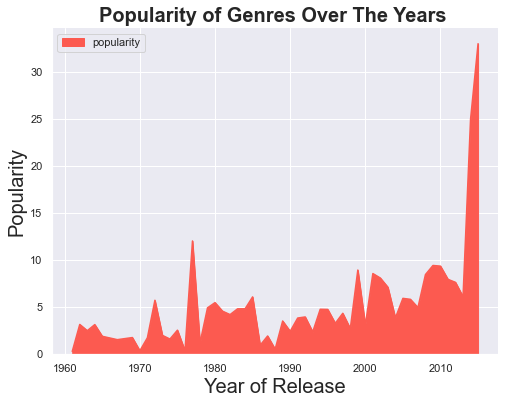

In [986]:
#Plot a scatter graph observing the popularity of genres over the years
top_genre.plot(x = 'release_year',
               y = 'popularity',
               kind = 'area',
               figsize = (8,6),
               color = '#FC5A50');
plt.ylabel('Popularity',
           fontsize = 14, 
           size = (20));
plt.xlabel('Year of Release',
           fontsize = 14, 
           size = (20));
plt.title('Popularity of Genres Over The Years ', 
          fontsize=20, 
          size = (20), 
          fontweight = 'bold')
sns.despine()

#### INFERENCE: 
1. The popularity of genres over the course of the years fluctuated due to some movies having multiple genres. 2015 and 2016 showerd massive rise in the popularity of the genre, drama which is likely due to inception of more streaming services such as Netflix, Hulu etc.

### Research Question 3 - Which Movie Has The Highest profit?

In [987]:
#Observing the profits of movies
movie_df['profit'] = movie_df['revenue']-movie_df['budget']
movie_df['profit'] = movie_df['profit'].apply(np.int64)
movie_df['budget'] = movie_df['budget'].apply(np.int64)
movie_df['revenue'] = movie_df['revenue'].apply(np.int64)

In [988]:
#Define the top 15 movies for all columns and plot a bar graph
def high_revenue_movie(column_name,size = 15):
    movie_sort_df = pd.DataFrame(movie_df[column_name].sort_values(ascending = False))[:size]
    movie_sort_df['original_title'] = movie_df['original_title']
    plt.figure(figsize = (16,8))
    movie_average = np.mean(movie_df[column_name])   
    sns.barplot(x = column_name, y = 'original_title',
                data = movie_sort_df,
                label = column_name)
    plt.axvline(movie_average,
                color = 'k',
                linestyle = 'dotted',
                label = 'mean')
    if (column_name == 'profit' or column_name == 'budget' or column_name == 'revenue'):
        plt.xlabel('Profits (U.S.D)')
    else:
        plt.xlabel('Profits', 
                   size = (20))
    plt.ylabel('Movies',
               size = (20))
    plt.title('The Most Profitable Movies by Highest Revenue ',
              size = (25))
    plt.legend()

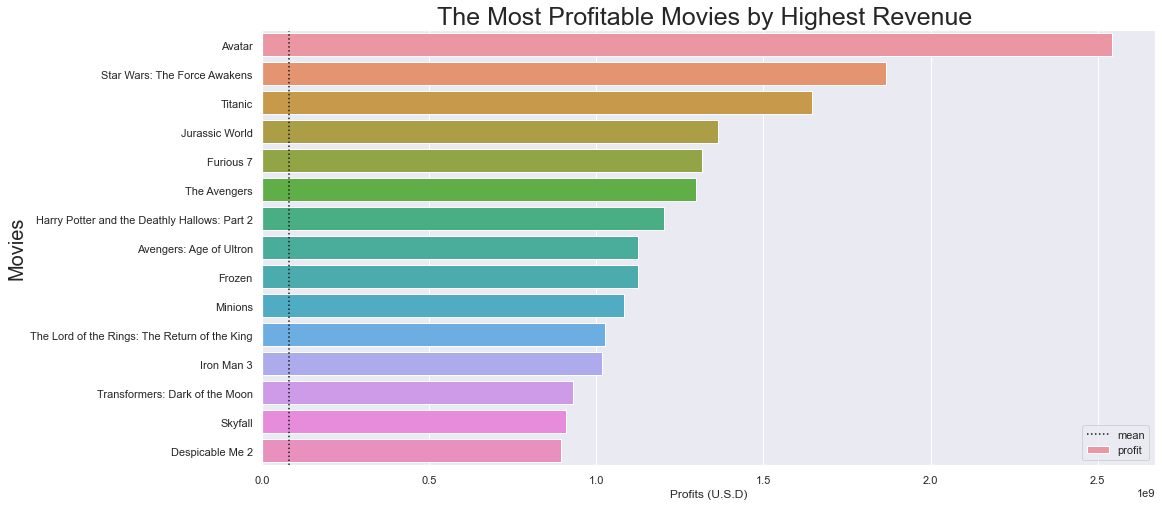

In [989]:
high_revenue_movie('profit')

#### INFERENCE: 
1. The top 15 movies are shown above with Avatar grossing a little over 2.5 billion followed Star Wars, Titanic and Jurassic World respectively.

### Research Question 4 - What are the charactaristics of highly performing revenue movie?

In [990]:
#Find the average revenue of the movie data
high_revenue_average = movie_df.revenue_adj.mean()
high_revenue_average

130369967.59770067

In [991]:
#Observe all the movies higher than or equal to the average revenue
high_revenue_df = movie_df[movie_df['revenue_adj'] >= high_revenue_average]
high_revenue_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10689,660,tt0059800,1.910465,11000000,141195658,Thunderball,Sean Connery|Claudine Auger|Adolfo Celi|Lucian...,http://www.mgm.com/view/movie/2009/Thunderball/,Terence Young,Look up! Look down! Look out!,...,130,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),2065-12-16,331,6.3,1965,7.612620e+07,9.771535e+08,130195658
10724,668,tt0064757,1.778746,7000000,81974493,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,http://www.mgm.com/view/movie/1411/On-Her-Maje...,Peter R. Hunt,Far up! Far out! Far more! James Bond 007 is b...,...,142,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,2069-12-12,258,6.4,1969,4.160985e+07,4.872780e+08,74974493
10759,948,tt0077651,1.198849,300000,70000000,Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,http://www.theofficialjohncarpenter.com/hallow...,John Carpenter,The Night HE Came Home!,...,91,Horror|Thriller,Compass International Pictures|Falcon Internat...,1978-10-25,522,7.3,1978,1.002810e+06,2.339890e+08,69700000
10760,8469,tt0077975,1.157930,2700000,141000000,Animal House,John Belushi|Tim Matheson|John Vernon|Verna Bl...,http://www.animalhouse.com/,John Landis,It was the Deltas against the rules... the rul...,...,109,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,1978-07-27,230,6.7,1978,9.025292e+06,4.713208e+08,138300000


In [992]:
high_revenue_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,516.000000,516.000000,5.160000e+02,5.160000e+02,516.000000,516.000000,516.000000,516.000000,5.160000e+02,5.160000e+02,5.160000e+02
mean,44436.815891,2.904831,8.973351e+07,3.769351e+08,118.569767,1794.511628,6.517442,2005.515504,9.462931e+07,4.321026e+08,2.872016e+08
std,65789.986273,2.907060,6.313706e+07,3.027620e+08,33.503064,1563.075813,0.730265,9.988622,6.055187e+07,3.570740e+08,2.701278e+08
min,11.000000,0.044675,0.000000e+00,2.913300e+07,77.000000,13.000000,4.200000,1962.000000,0.000000e+00,1.308557e+08,-2.000000e+06
25%,1261.250000,1.354994,4.000000e+07,1.752350e+08,102.000000,652.250000,6.000000,2003.000000,4.664570e+07,1.963707e+08,1.161304e+08
50%,13138.000000,2.123555,7.850000e+07,2.729503e+08,115.000000,1277.500000,6.500000,2009.000000,8.238966e+07,3.122305e+08,1.898144e+08
75%,57908.250000,3.444774,1.300000e+08,4.768135e+08,130.000000,2597.250000,7.025000,2012.000000,1.381333e+08,5.499185e+08,3.784747e+08
max,331214.000000,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09,2.544506e+09


#### INFERENCE: 
1. The average runtime of an average movie is 118 mins, almost 2 hours.
2. For a movie to do well and be sustainable, an average rating of 4.2 has to be achieved.
3. For a movie to be a part of the 75th percentile, it needs a budget of 1.3 billion dollors.  
4. Its obvious the highly performed movies occured in 2015 due to factors such as economic growth that                            year, incorporation of more streaming services i.e Netflix, Hulu etc.

### Research Question 5 - Who is the best director of 2015?

In [993]:
# Observe the release year column of year 2015
director_df = movie_df[movie_df['release_year'] == 2015]

In [994]:
#Group the director_df according to the director column with respect to mean of the movies
director_df1 = director_df.groupby('director').mean().vote_average

In [995]:
#Sort the sorted director and sort based on the ratings
director_sort = director_df1.sort_values(ascending = False) 

In [996]:
#View the dataframe
director_sort

director
Lenny Abrahamson       8.0
Pete Docter            8.0
Tom McCarthy           7.8
Craig Viveiros         7.7
Alfonso Gomez-Rejon    7.7
                      ... 
Fred Wolf              4.2
Matt Osterman          4.2
Steven C. Miller       4.2
Rob Cohen              3.9
Jared Cohn             3.1
Name: vote_average, Length: 164, dtype: float64

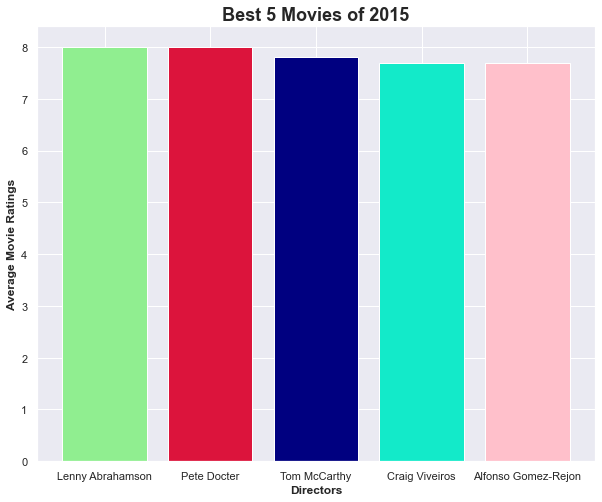

In [997]:
labels = ['#90EE90', '#DC143C', '#000080', '#13EAC9', '#FFC0CB']
plt.figure(figsize = (10, 8))
plt.bar(director_sort.index[:5],
        director_sort[:5], 
        color = labels)
plt.title('Best 5 Movies of 2015',
          fontsize = 18,
          fontweight = 'bold')
plt.xlabel('Directors', 
           fontsize = 12,
           fontweight = 'bold')
plt.ylabel('Average Movie Ratings', 
           fontsize = 12,
           fontweight = 'bold');
plt.show()

### INFERENCE:
The above graph depicts the ratings of the highest performing directors of the year 2015

<a id='conclusions'></a>
## Limitations

In the course of the analysis, few drawbacks were stumbled upon that slightly affected the legitimacy of the dataset.

1. There were null values in the dataset that had to be dropped. This directly affected the inferences as +-1 of a data can add or depreciate major inferences during the analysis.

2. Also, there was a duplicated value that had to be dropped. It could've been due to data scrapping or system erro that wasn't investigated.

3. Lastly, some cloumns were irrelevant in the analysis such as imdb_id, tagline, keyword and overview.   

<a id='conclusions'></a>
## Conclusions

The analysis of the dataset provided great insights:
1. What is the relationship between the Revenue, Popularity, and Rating? 

The relationships between Revenue, Popularity, and Rating provided great permutations. After observing the scatter plot,      its obvious popularity of movies rise with revenue invested. Also, the popularity of the movies increases with ratings on      the average and right skewed but there are few outliers that overperformed. Lastly, the ratings of the movies increases        with revenue on the average and right skewed but there are few outliers that overperformed.
   
2. Which year had the most popular genre?

The popularity of genres over the course of the years fluctuated due to some movies having multiple genres. 2015 and 2016 showerd massive rise in the popularity of the genre, drama which is likely due to inception of more streaming services such as Netflix, Hulu etc.

3. Which Movie Has The Highest profit?

The top 15 movies are shown above with Avatar grossing a little over 2.5 billion followed Star Wars, Titanic and Jurassic World respectively.

4. What are the charactaristics of highly performing revenue movie?

The average runtime of an average movie is 118 mins, almost 2 hours. Also,for a movie to do well and be sustainable, an average rating of 4.2 has to be achieved. Furthermore, or a movie to be a part of the 75th percentile, it needs a budget of 1.3 billion dollors.Lastly, its obvious the highly performed movies occured in 2015 due to factors such as economic growth that year, incorporation of  more streaming services i.e Netflix, Hulu etc.

5.  Who is the best director of 2015?

From the graph analysis, the best director is tied Lenny Abrahamson and Pete Docter with 8.0 ratings, followed by Tom McCarthy  of 7.8, Craig Viveiros of 7.7, and lastly, Alfonso Gomez-Rejon of 7.7 ratings.

<a id='conclusions'></a>
## Reference

https://www.w3resource.com/python-exercises/pandas/python-pandas-data-frame-exercise-16.php
    
https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order

https://stackoverflow.com/questions/34028255/set-height-and-width-of-figure-created-with-plt-subplots-in-matplotlib
    
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html
    
https://stackoverflow.com/questions/43217174/how-can-the-sizes-and-rotations-of-text-of-a-pandas-scatter-matrix-be-set

In [998]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295